### Set up Vocabulary

In [1]:
import pickle
import numpy as np
from tensorflow.keras import backend as k

In [2]:
with open("train_qa.txt", "rb") as fp:
    train_data = pickle.load(fp)

In [3]:
train_data

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [4]:
with open("test_qa.txt", "rb") as fp:
    test_data = pickle.load(fp)

In [5]:
test_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [6]:
type(train_data)

list

In [7]:
type(test_data)

list

In [8]:
len(train_data)

10000

In [9]:
len(test_data)

1000

In [10]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [11]:
train_data[0][0]

['Mary',
 'moved',
 'to',
 'the',
 'bathroom',
 '.',
 'Sandra',
 'journeyed',
 'to',
 'the',
 'bedroom',
 '.']

In [12]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [13]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [14]:
vocab = set()

In [15]:
total_data = train_data+test_data

In [16]:
len(total_data)

11000

In [17]:
total_data

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [18]:
for i in total_data:
    print(i)
    break

(['Mary', 'moved', 'to', 'the', 'bathroom', '.', 'Sandra', 'journeyed', 'to', 'the', 'bedroom', '.'], ['Is', 'Sandra', 'in', 'the', 'hallway', '?'], 'no')


In [19]:
for story, question, answer in total_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [20]:
vocab.add('yes')
vocab.add('no')

In [21]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [22]:
len(vocab)

37

In [23]:
vocab_len = len(vocab) + 1

In [24]:
max_story_len = max([len(data[0]) for data in total_data])
max_story_len

156

In [25]:
max_question_len = max([len(data[1]) for data in total_data])
max_question_len

6

### Vectorizing

In [26]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [27]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [28]:
tokenizers = Tokenizer(filters=[])

In [29]:
tokenizers.fit_on_texts(vocab)

In [30]:
train_story_text = []
train_question_text = []
train_answer_text = []
 
for story, question, answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)

In [31]:
train_story_seq = tokenizers.texts_to_sequences(train_story_text)

In [32]:
len(train_story_text)

10000

In [33]:
len(train_story_seq)

10000

In [34]:
train_story_seq

[[25, 4, 34, 7, 22, 27, 37, 5, 34, 7, 15, 27],
 [25,
  4,
  34,
  7,
  22,
  27,
  37,
  5,
  34,
  7,
  15,
  27,
  25,
  12,
  1,
  34,
  7,
  15,
  27,
  16,
  12,
  1,
  34,
  7,
  24,
  27],
 [25,
  4,
  34,
  7,
  22,
  27,
  37,
  5,
  34,
  7,
  15,
  27,
  25,
  12,
  1,
  34,
  7,
  15,
  27,
  16,
  12,
  1,
  34,
  7,
  24,
  27,
  37,
  12,
  34,
  7,
  30,
  27,
  16,
  12,
  1,
  34,
  7,
  22,
  27],
 [25,
  4,
  34,
  7,
  22,
  27,
  37,
  5,
  34,
  7,
  15,
  27,
  25,
  12,
  1,
  34,
  7,
  15,
  27,
  16,
  12,
  1,
  34,
  7,
  24,
  27,
  37,
  12,
  34,
  7,
  30,
  27,
  16,
  12,
  1,
  34,
  7,
  22,
  27,
  16,
  8,
  13,
  7,
  31,
  17,
  27,
  16,
  12,
  34,
  7,
  15,
  27],
 [25,
  4,
  34,
  7,
  22,
  27,
  37,
  5,
  34,
  7,
  15,
  27,
  25,
  12,
  1,
  34,
  7,
  15,
  27,
  16,
  12,
  1,
  34,
  7,
  24,
  27,
  37,
  12,
  34,
  7,
  30,
  27,
  16,
  12,
  1,
  34,
  7,
  22,
  27,
  16,
  8,
  13,
  7,
  31,
  17,
  27,
  16,
  12,
  34,


In [35]:
train_story_text

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'went',
  'to',
  'the',
  'kitchen',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'bathroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to

In [36]:
def vectorize_stories(data, word_index = tokenizers.word_index, max_ques_len = max_question_len,
                     max_story_len = max_story_len):
    X = []
    Xq = []
    Y = []
    
    for story,question, answer in data:
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in question]
        y = np.zeros(len(word_index)+1)
        y[word_index[answer]] = 1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
    return (pad_sequences(X, max_story_len),
            pad_sequences(Xq, max_ques_len), 
            np.array(Y))

In [37]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [38]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [39]:
inputs_train

array([[ 0,  0,  0, ...,  7, 15, 27],
       [ 0,  0,  0, ...,  7, 24, 27],
       [ 0,  0,  0, ...,  7, 22, 27],
       ...,
       [ 0,  0,  0, ...,  7, 15, 27],
       [ 0,  0,  0, ...,  3, 17, 27],
       [ 0,  0,  0, ..., 18, 17, 27]])

In [40]:
queries_test

array([[10, 28, 35,  7, 30,  2],
       [10, 28, 35,  7, 30,  2],
       [10, 28, 35,  7, 23,  2],
       ...,
       [10, 25, 35,  7, 15,  2],
       [10, 37, 35,  7, 23,  2],
       [10, 25, 35,  7, 23,  2]])

In [41]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
tokenizers.word_index['yes']

14

In [43]:
tokenizers.word_index['no']

26

### Build Model

In [44]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Input, Activation, Dense, Permute, Dropout, add, dot, concatenate, LSTM

In [45]:
input_sequence = Input((max_story_len, ))
question = Input((max_question_len,))

In [46]:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim = vocab_len, output_dim = 64))
input_encoder_m.add(Dropout(0.3))

In [47]:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim = vocab_len, output_dim = max_question_len))
input_encoder_c.add(Dropout(0.3))

In [48]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim = vocab_len, output_dim = 64, input_length = max_question_len))
question_encoder.add(Dropout(0.3))

In [49]:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [50]:
match = dot([input_encoded_m, question_encoded], axes=(2,2))
match = Activation('softmax')(match)

In [51]:
response = add([match,input_encoded_c])
response = Permute((2,1))(response)

In [52]:
answer = concatenate([response, question_encoded])

In [53]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [54]:
answer = LSTM(32)(answer)

In [55]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_len)(answer)

In [56]:
answer = Activation('softmax')(answer)

In [57]:
model = Model([input_sequence, question], answer)
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [58]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 156)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, None, 64)     2432        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 6, 64)        2432        input_2[0][0]                    
______________________________________________________________________________________________

In [59]:
history = model.fit([inputs_train, queries_train], answers_train,
                    batch_size = 32, epochs = 22,
                    validation_data = ([inputs_test, queries_test], answers_test)
                    )

Epoch 1/22
313/313 [==============================] - 13s 24ms/step - loss: 0.9476 - accuracy: 0.4927 - val_loss: 0.6949 - val_accuracy: 0.5030
Epoch 2/22
313/313 [==============================] - 7s 22ms/step - loss: 0.7030 - accuracy: 0.5020 - val_loss: 0.6934 - val_accuracy: 0.5030
Epoch 3/22
313/313 [==============================] - 7s 22ms/step - loss: 0.6955 - accuracy: 0.5105 - val_loss: 0.6955 - val_accuracy: 0.5030
Epoch 4/22
313/313 [==============================] - 7s 24ms/step - loss: 0.6956 - accuracy: 0.5020 - val_loss: 0.6945 - val_accuracy: 0.4970
Epoch 5/22
313/313 [==============================] - 7s 23ms/step - loss: 0.6942 - accuracy: 0.5030 - val_loss: 0.6933 - val_accuracy: 0.4970
Epoch 6/22
313/313 [==============================] - 7s 22ms/step - loss: 0.6948 - accuracy: 0.4989 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 7/22
313/313 [==============================] - 7s 22ms/step - loss: 0.6940 - accuracy: 0.5035 - val_loss: 0.6931 - val_accuracy: 0.503

### Evaluate accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


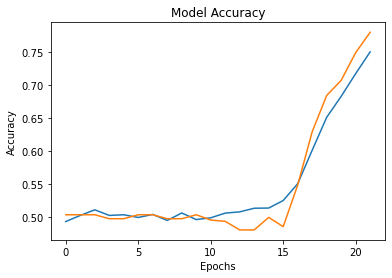

In [63]:
import matplotlib.pyplot as plt

print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel("Epochs")

plt.show()

In [64]:
model.save('chatbot_model')

INFO:tensorflow:Assets written to: chatbot_model\assets


C:\Users\anand\Anaconda3\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
INFO:tensorflow:Assets written to: chatbot_model\assets


In [65]:
model.load_weights('chatbot_model')

In [66]:
pred_results = model.predict(([inputs_test, queries_test]))

In [67]:
pred_results

array([[5.2268498e-13, 8.1393036e-13, 6.2670886e-13, ..., 5.6672668e-13,
        5.3186568e-13, 4.3984358e-13],
       [2.8942525e-13, 4.6910040e-13, 4.3679036e-13, ..., 5.1083400e-13,
        3.3672552e-13, 2.7476288e-13],
       [2.4616631e-10, 2.8715824e-10, 1.8295446e-10, ..., 1.9074321e-10,
        3.2034997e-10, 2.0944249e-10],
       ...,
       [4.3276806e-12, 4.4654900e-12, 4.3984816e-12, ..., 5.1099632e-12,
        4.3513609e-12, 5.9284752e-12],
       [2.0083577e-09, 2.3418982e-09, 1.6873597e-09, ..., 1.5646894e-09,
        2.3601130e-09, 1.8482036e-09],
       [1.0841230e-09, 1.1546991e-09, 1.0731902e-09, ..., 1.0953092e-09,
        1.0741753e-09, 1.4018225e-09]], dtype=float32)

In [68]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

### Use saved model for predction

In [70]:
story = ' '.join(word for word in test_data[100][0])

In [71]:
story

'John took the apple there . John went to the bathroom .'

In [72]:
query = ' '.join(word for word in test_data[100][1])

In [73]:
query

'Is John in the hallway ?'

In [74]:
test_data[100][2]

'no'

In [79]:
val_max = np.argmax(pred_results[37])

for key, val in tokenizers.word_index.items():
    if val == val_max:
        k = key
print("Predicted answer is :", k)
print("Probability of certainity:", pred_results[37][val_max])

Predicted answer is : yes
Probability of certainity: 0.93358284


In [80]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [81]:
story = "Daniel dropped the milk . John discarded football in the office . Daniel went to kitchen . "

In [82]:
story.split()

['Daniel',
 'dropped',
 'the',
 'milk',
 '.',
 'John',
 'discarded',
 'football',
 'in',
 'the',
 'office',
 '.',
 'Daniel',
 'went',
 'to',
 'kitchen',
 '.']

In [83]:
my_question = "Is John in the garden ? "

In [84]:
my_question.split()

['Is', 'John', 'in', 'the', 'garden', '?']

In [85]:
my_data = [(story.split(), my_question.split(), 'no')]

In [86]:
my_story, my_ques, my_ans = vectorize_stories(my_data)

In [87]:
pred_result = model.predict(([my_story, my_ques]))

In [88]:
val_max = np.argmax(pred_results[0])

for key, val in tokenizers.word_index.items():
    if val == val_max:
        k = key
print("Predicted answer is :", k)
print("Probability of certainity:", pred_results[0][val_max])

Predicted answer is : no
Probability of certainity: 0.5798246
